In [2]:
!pip3 install torch torchvision matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
train_data = datasets.MNIST(
    root='data',
    train=True,
    transform=ToTensor(),
    download=True
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor(),
    download=True
)

Using downloaded and verified file: data\MNIST\raw\train-images-idx3-ubyte.gz
Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Using downloaded and verified file: data\MNIST\raw\train-labels-idx1-ubyte.gz
Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 1648877/1648877 [00:09<00:00, 180394.27it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1000)>



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [11]:
test_data.data.size()

torch.Size([10000, 28, 28])

In [12]:
train_data.targets.size()

torch.Size([60000])

In [13]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [14]:
from torch.utils.data import DataLoader
loaders = {
    "train": DataLoader(train_data, batch_size=100, shuffle=True,num_workers=1),
    "test": DataLoader(test_data, batch_size=100, shuffle=True,num_workers=1)
}

In [15]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1c4de9f3320>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1c4decca480>}

In [17]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        self.convl = nn.Conv2d(1,10,kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.convl(x),2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1,320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)

In [18]:
import torch 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [19]:
device

device(type='cuda')

In [21]:
model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data,target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx *len(data)}/{len(loaders['train'].dataset)} ({100.*batch_idx/len(loaders['train']):.0f}%)]\t({loss.item():.6f})')

def test():
    model.eval()

    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output,target).item()
            pred = output.argmax(dim=1, keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders['test'].dataset)} ({100. *correct /len(loaders['test'].dataset): .0f}%\n)')



In [22]:
#for training
for epoch in range(1,11):
    train(epoch)
    test()

C:\Users\unkno\AppData\Local\Temp\ipykernel_18888\224280314.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	(2.303185)
Train Epoch: 1 [2000/60000 (3%)]	(2.292082)
Train Epoch: 1 [4000/60000 (7%)]	(2.204748)
Train Epoch: 1 [6000/60000 (10%)]	(1.969987)
Train Epoch: 1 [8000/60000 (13%)]	(1.883433)
Train Epoch: 1 [10000/60000 (17%)]	(1.839657)
Train Epoch: 1 [12000/60000 (20%)]	(1.799004)
Train Epoch: 1 [14000/60000 (23%)]	(1.686671)
Train Epoch: 1 [16000/60000 (27%)]	(1.756750)
Train Epoch: 1 [18000/60000 (30%)]	(1.760636)
Train Epoch: 1 [20000/60000 (33%)]	(1.667254)
Train Epoch: 1 [22000/60000 (37%)]	(1.707098)
Train Epoch: 1 [24000/60000 (40%)]	(1.671816)
Train Epoch: 1 [26000/60000 (43%)]	(1.640796)
Train Epoch: 1 [28000/60000 (47%)]	(1.702589)
Train Epoch: 1 [30000/60000 (50%)]	(1.709079)
Train Epoch: 1 [32000/60000 (53%)]	(1.642022)
Train Epoch: 1 [34000/60000 (57%)]	(1.644683)
Train Epoch: 1 [36000/60000 (60%)]	(1.618223)
Train Epoch: 1 [38000/60000 (63%)]	(1.631436)
Train Epoch: 1 [40000/60000 (67%)]	(1.631149)
Train Epoch: 1 [42000/60000 (70%)]	(1.615597)

Prediction: 9


C:\Users\unkno\AppData\Local\Temp\ipykernel_18888\224280314.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


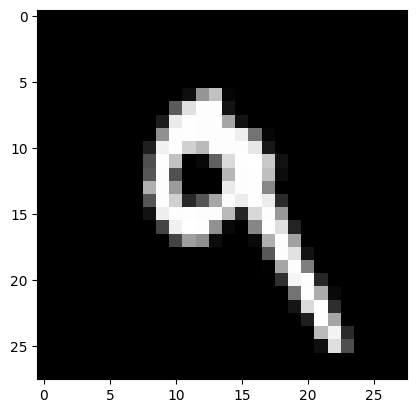

In [25]:
import matplotlib.pyplot as plt

model.eval()

data,target  = test_data[7]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim = True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')

plt.show()